In [1]:
#import Libary
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split
import os

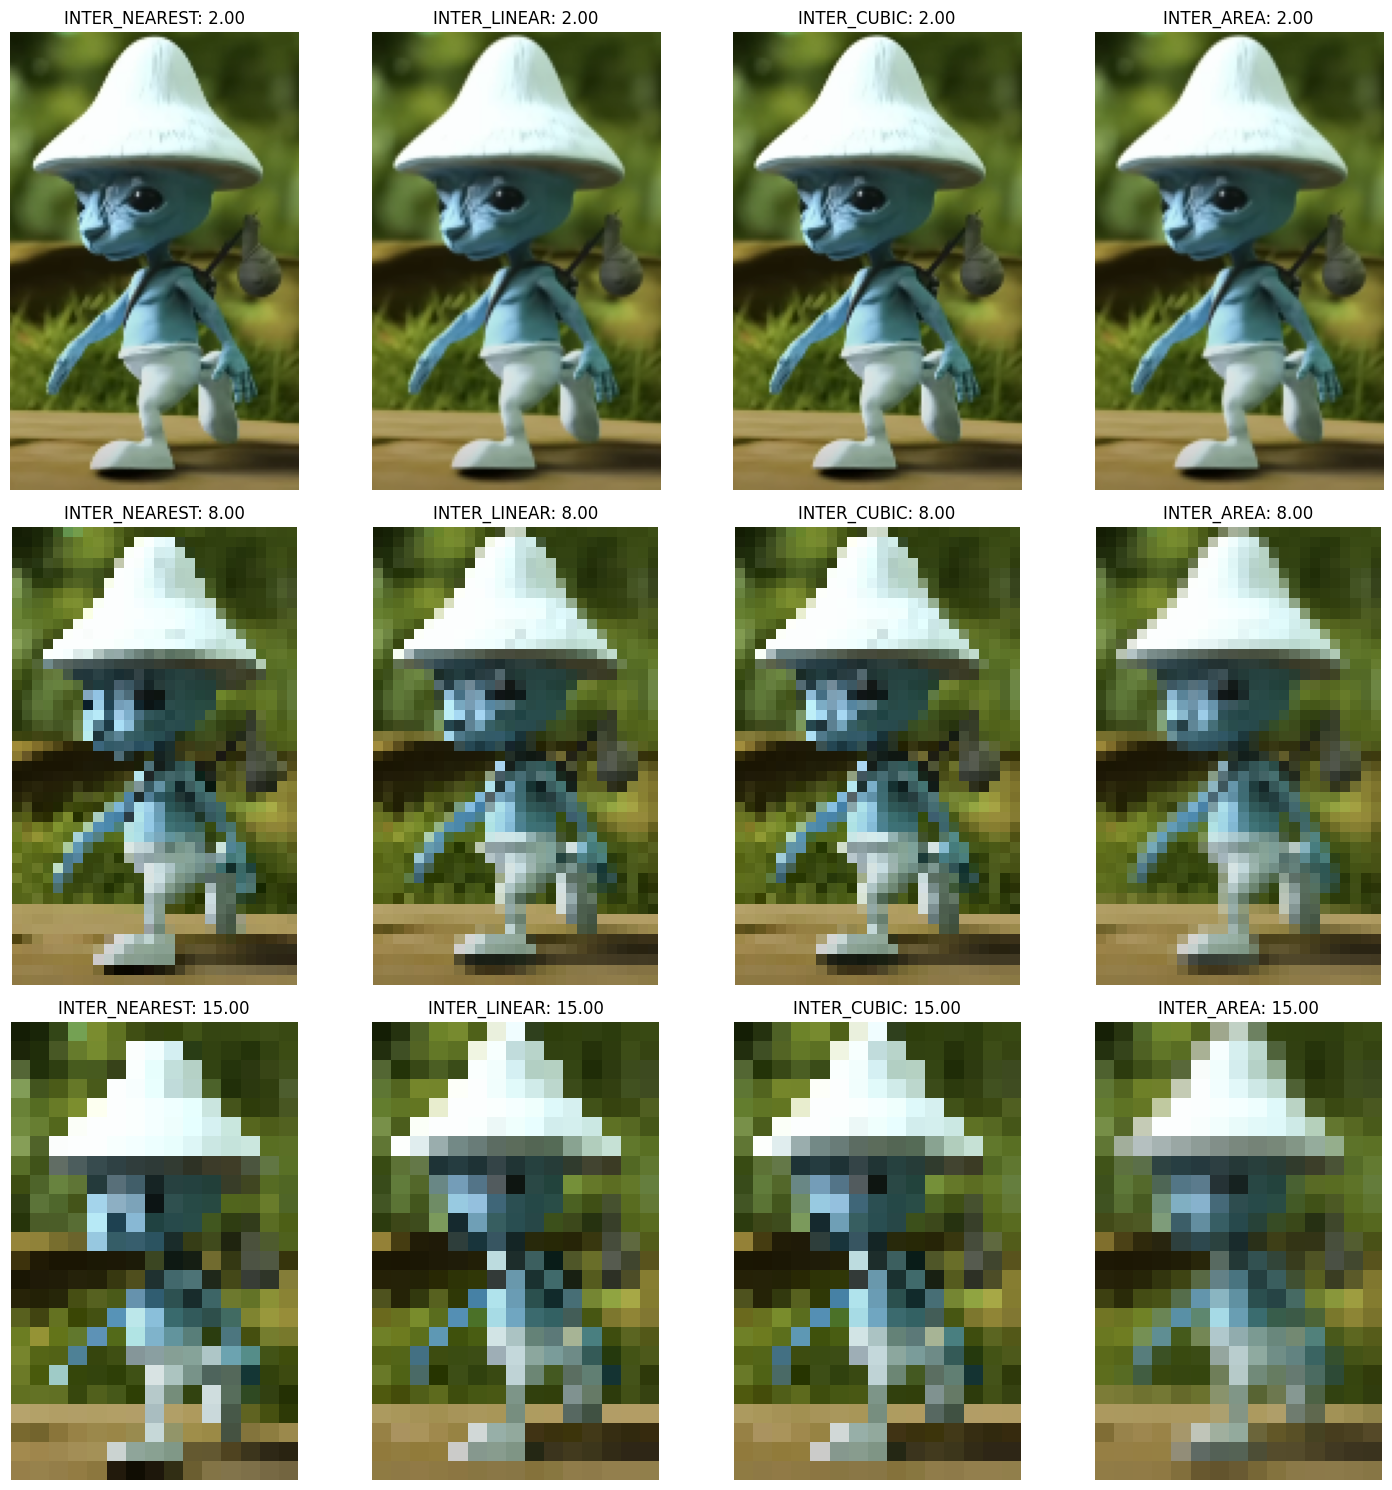

In [11]:
# Read the image
image = cv2.imread("../PIC/21.png")
# Define resize factors
reduce_factors = [2, 8, 15]
scale_factors = [1 / factor for factor in reduce_factors]

# Define interpolation methods
interpolation_methods = [cv2.INTER_NEAREST,cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
interpolation_title = ["INTER_NEAREST","INTER_LINEAR","INTER_CUBIC","INTER_AREA"]
# Create a subplot grid
fig, axs = plt.subplots(len(reduce_factors), len(interpolation_methods), figsize=(15, 15))

# Loop through each combination of scale factor and interpolation method
for i, scale_factor in enumerate(scale_factors):
    for j, inter_method in enumerate(interpolation_methods):
        # Resize the image using the current scale factor and interpolation method
        resized_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=inter_method)
        
        # Display the resized image in the corresponding subplot
        axs[i, j].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        axs[i, j].set_title(f"{interpolation_title[j]}: {1/scale_factor:.2f}")
        axs[i, j].axis("off")

plt.tight_layout()
plt.show()

In [3]:
# Define Gaussian noise function
def add_gaussian_noise(img):
    mean = 0
    sigma = 25  # You can adjust the standard deviation as needed
    noisy_img = img + np.random.normal(mean, sigma, img.shape)
    noisy_img = np.clip(noisy_img, 0, 255)  # Clip values to stay within [0, 255] range
    noisy_img = noisy_img.astype('uint8')  # Convert back to uint8
    return noisy_img

In [8]:
# Define parameters
Npic = 100  # Number of augmented images to generate
rotation_range = 40
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True
fill_mode = ['constant', 'nearest', 'reflect', 'wrap']

#import image
img = cv2.imread('../PIC/21.png')
cv2.resize((cv2.cvtColor((img), cv2.COLOR_BGR2RGB)), (100, 100))


# Create a VideoWriter object to save the images as a video
output_file = 'output_video_4.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Video codec (you can change this as needed)
fps = 30.0  # Frames per second
frame_size = (img.shape[1], img.shape[0])  # Use the size of the input image
out = cv2.VideoWriter(output_file, fourcc, fps, frame_size)


# Define ImageDataGenerator with parameters
datagen = ImageDataGenerator(
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    preprocessing_function=add_gaussian_noise,
    fill_mode=fill_mode[3]
)

# Creates our batch of one image
img = np.expand_dims(img, axis=0)  # Add batch dimension
pic = datagen.flow(img, batch_size=1)

#Create Folder
os.makedirs('augmented_images', exist_ok=True)

# Randomly generate transformed images and write them to the video file
for i in range(1, Npic):
    batch = pic.next()
    im_result = batch[0].astype('uint8')
    
    # Write the transformed image to the video file
    out.write(im_result)

# Release the VideoWriter object
out.release()
